In [1]:

import open3d as o3d
import os
import glob
from data_importer import PointCloudManager, DataExtractor


base_folder = "postPCD"  # dir to PCD folders
manager = PointCloudManager(base_folder)
pcd_mic, pcd, filtered_pcd = manager.run()

extractor = DataExtractor('Recording-vvs-1m-20kHz-rightear.mat')
recording = extractor.load_data()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Available subfolders:
0: vvs-20kHz-12.8k-rightEar-realigned_20231120_163043


In [34]:
from SoundFieldAnalysis import SoundFieldAnalysis

# initialize the variables
BF_analysis = SoundFieldAnalysis(pcd_mic,recording,filtered_pcd, freq=8000)
BF_analysis.calculate_3D_DAS()

array([0.00085875+0.j, 0.000774  +0.j, 0.00075315+0.j, ...,
       0.00091969+0.j, 0.0009146 +0.j, 0.00090207+0.j])

In [35]:
import numpy as np
from SoundFieldAnalysis import SoundFieldAnalysis

S = BF_analysis.S
Pxy = BF_analysis.Pxy
print(S.shape)
eigenVal, eigenVec = np.linalg.eig(S)

(36, 36)


c:\Users\lieng\.conda\envs\my_new_env\envs\environment\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\lieng\.conda\envs\my_new_env\envs\environment\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)


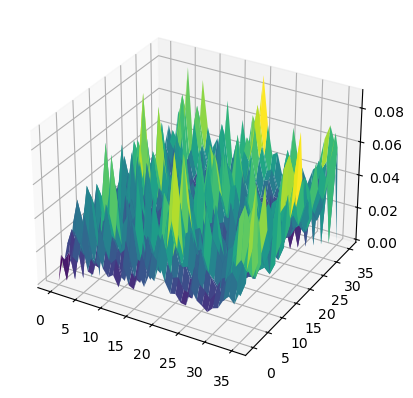

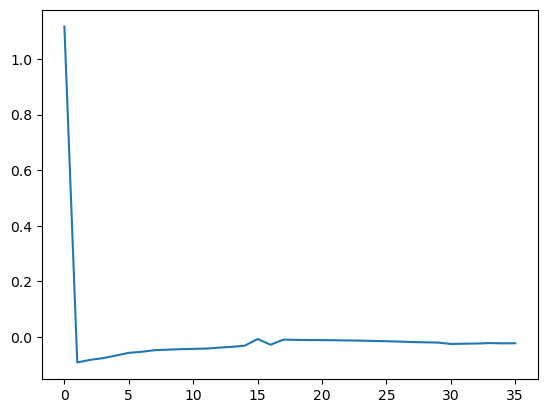

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, 35, 36)
y = np.linspace(0, 35, 36)
x, y = np.meshgrid(x, y)

ax.plot_surface(x, y, S, cmap='viridis')

plt.figure()
plt.plot(eigenVal)

In [37]:
import ipywidgets as widgets

def plot_eigenVec(index):
    plt.figure(figsize=(10, 6))
    plt.plot(eigenVec[:, index])
    plt.title(f'Plot for eigenVec[:, {index}]')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

# 创建滑块
slider = widgets.IntSlider(min=0, max=eigenVec.shape[1]-1, step=1, value=10, description='Index:')

# 使用interact连接滑块和绘图函数
widgets.interact(plot_eigenVec, index=slider)

interactive(children=(IntSlider(value=10, description='Index:', max=35), Output()), _dom_classes=('widget-inte…

<function __main__.plot_eigenVec(index)>

In [40]:
import scipy

pcd_mic,recording,pcd

mic_array = np.array(pcd_mic.points)
sound_field = recording
points = np.array(pcd.points)
E_n = eigenVec[:,1:]
P = []

distance = scipy.spatial.distance.cdist(mic_array, points, metric="euclidean")
for i in range(len(distance[2,:])):
    a = distance[:,i]
    Pi =  1/(np.abs(a.conj().T @ E_n @ E_n.conj().T @ a))
    P.append(Pi)

c:\Users\lieng\.conda\envs\my_new_env\envs\environment\lib\site-packages\pyvista\jupyter\notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


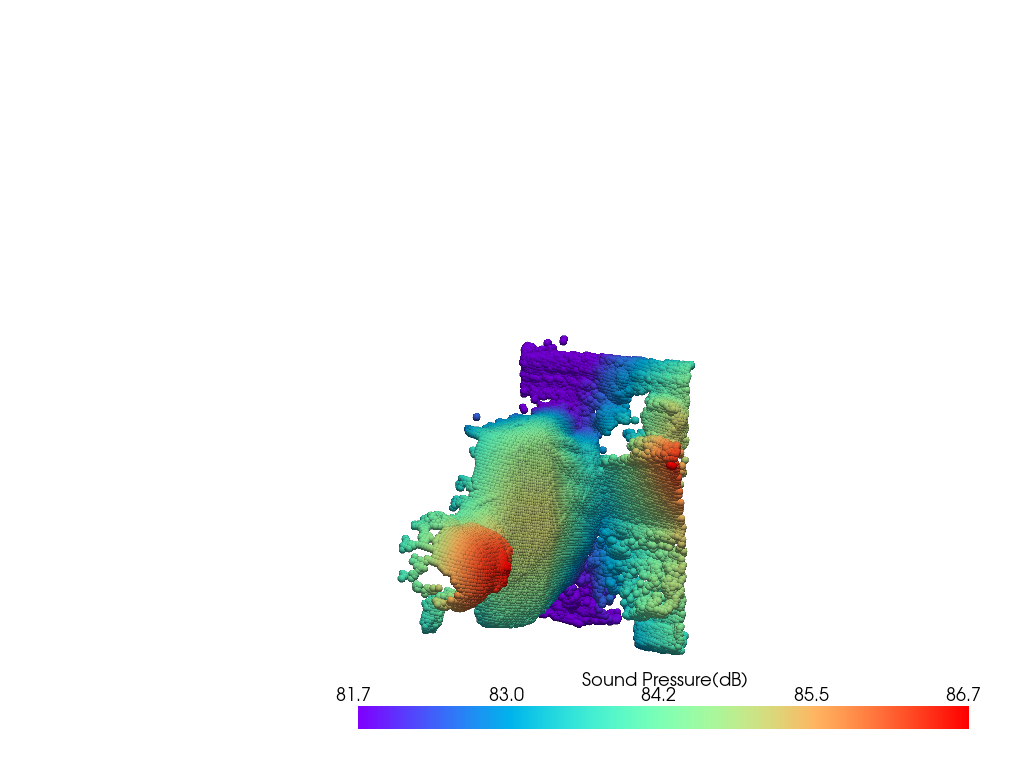

In [47]:
import pyvista as pv

P = np.array(P)
plotc = 20*np.log10(np.abs(P)/20e-6)
plotc_max = np.max(plotc)
plotc_min = plotc_max - 5
plotc_clamped = np.clip(plotc, plotc_min, plotc_max)

# Assuming self.points are your point coordinates and plotc is the scalar value for each point
cloud = pv.PolyData(points)
cloud["Sound Pressure(dB)"] = plotc_clamped  # Adding scalar values to the point cloud

# Create a Plotter object and add the point cloud
plotter = pv.Plotter()
plotter.add_mesh(cloud, cmap='rainbow', scalars='Sound Pressure(dB)', render_points_as_spheres=True, point_size=8)

plotter.camera_position = [(1, 1, -3), (0.5, 0, 0), (1, 0, 0)]  # 相机位置、焦点位置、向上的方向

# Show the point cloud
plotter.show()

c:\Users\lieng\.conda\envs\my_new_env\envs\environment\lib\site-packages\pyvista\jupyter\notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


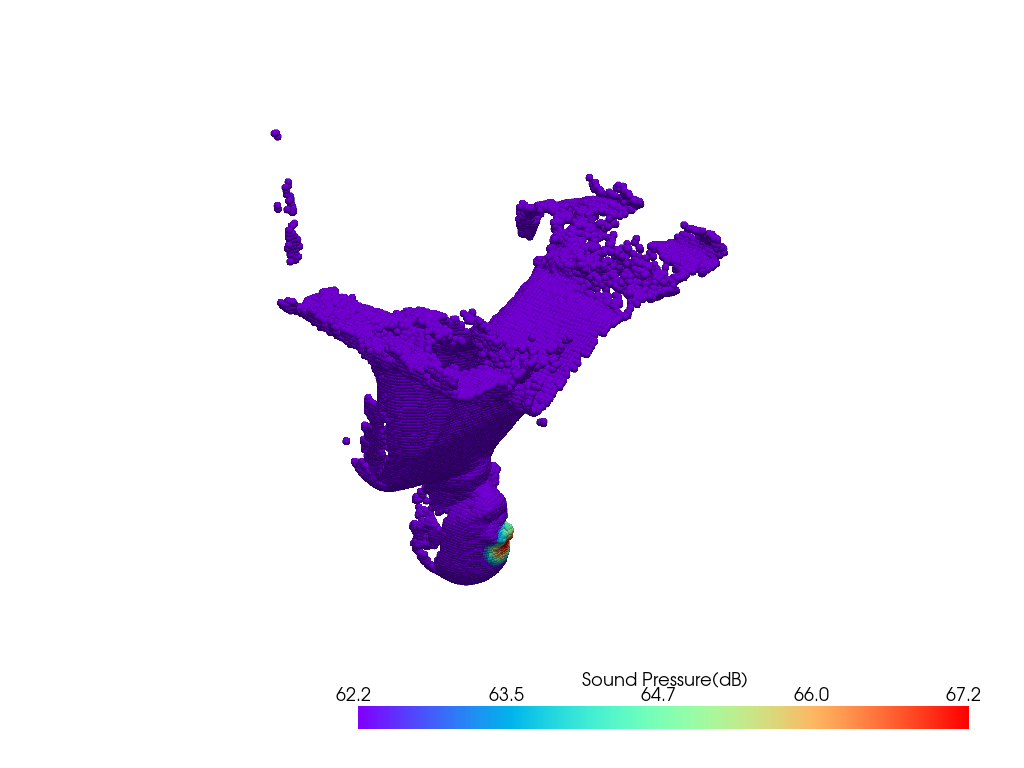

In [43]:
BF_analysis = SoundFieldAnalysis(pcd_mic,recording,pcd, freq=6000)
BF_analysis.calculate_3D_DAS()
BF_analysis.plot(dynamic_range = 5)

C:\Users\ZHLI\AppData\Local\anaconda3\lib\site-packages\pyvista\jupyter\notebook.py:33: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\ZHLI\AppData\Local\anaconda3\lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


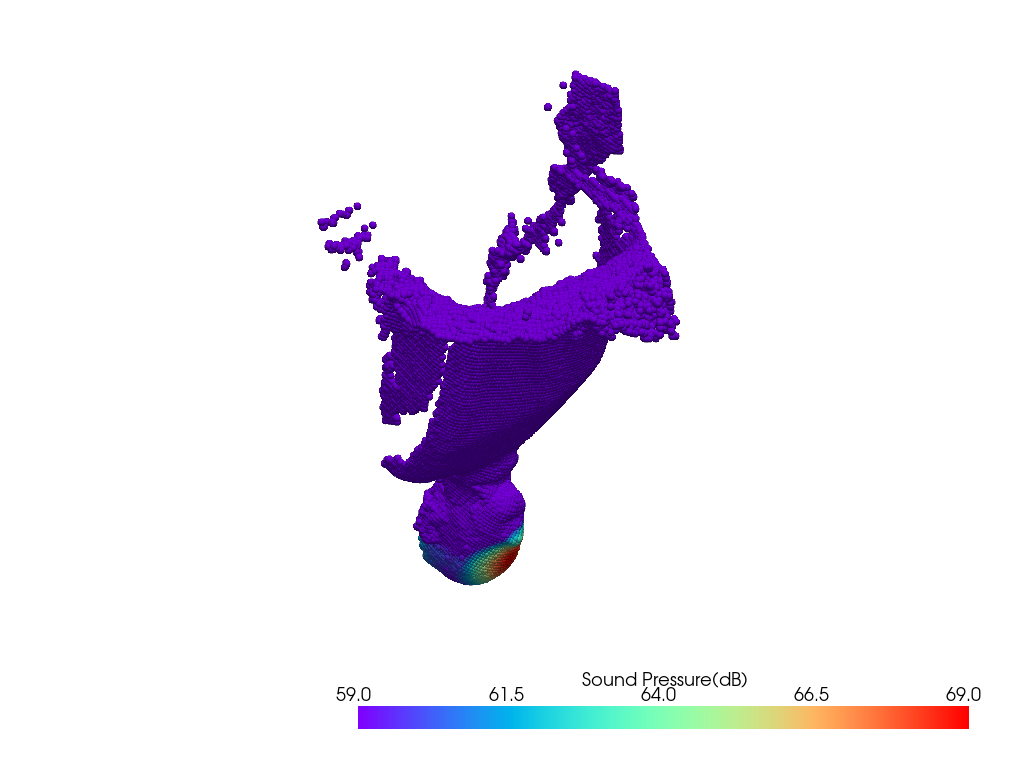

In [4]:
BF_analysis.plot(dynamic_range = 10)